<a href="https://colab.research.google.com/github/ericwang10/Malaria-CNN/blob/main/Malaria_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
import numpy as np
import cv2
import os 
import glob

In [ ]:
from keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()
print(type(X_train))

11493376/11490434 [==============================] - 3s 0us/step
<class 'numpy.ndarray'>


In [ ]:
batch_size = 16000 #number of images
num_classes = 2 #only 2 types of classifications
epochs = 12 

In [ ]:
#input image dimensions
img_rows, img_cols = 142, 163 


In [ ]:
# img = Image.open('cell_images/Uninfected/C1_thinF_IMG_20150604_104722_cell_9.png') 
# img

In [ ]:
from matplotlib import pyplot as plt


In [ ]:
uninfected_images = []
uninfected_labels = []
for file in glob.glob("cell_images/Uninfected/*.png"):
    file = cv2.imread(file)
    file = cv2.resize(file, (100,100))
    uninfected_images.append(file)
    uninfected_labels.append(0)
print(len(uninfected_images))

13779


In [ ]:
infected_images = []
infected_labels = []
for file in glob.glob("cell_images/Parasitized/*.png"):
    file = cv2.imread(file)
    file = cv2.resize(file, (100,100))
    infected_images.append(file)
    infected_labels.append(1)
print(len(infected_images))

13779


In [ ]:
print(type(uninfected_images[0]))

<class 'numpy.ndarray'>


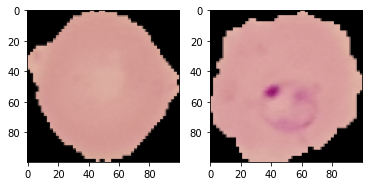

In [ ]:
plt.subplot(1, 2, 1), plt.imshow(cv2.cvtColor(uninfected_images[0], cv2.COLOR_BGR2RGB))
plt.subplot(1, 2, 2), plt.imshow(cv2.cvtColor(infected_images[0], cv2.COLOR_BGR2RGB))
# plt.subplot(1, 2, 1), plt.imshow(uninfected_images[0], 'gray')
# plt.subplot(1, 2, 2), plt.imshow(infected_images[0], 'gray')
plt.show()

In [ ]:
for image in uninfected_images:
    image = cv2.resize(image, (64,64))
for image in infected_images:
    image = cv2.resize(image, (64,64))


(<matplotlib.axes._subplots.AxesSubplot at 0x25623ce8790>,
 <matplotlib.image.AxesImage at 0x25623c18b50>)

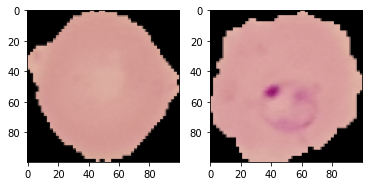

In [ ]:
plt.subplot(1, 2, 1), plt.imshow(cv2.cvtColor(uninfected_images[0], cv2.COLOR_BGR2RGB))
plt.subplot(1, 2, 2), plt.imshow(cv2.cvtColor(infected_images[0], cv2.COLOR_BGR2RGB))

In [ ]:
print(type(uninfected_images[0]))

<class 'numpy.ndarray'>


In [ ]:
#join our lists together
images = uninfected_images + infected_images
labels = uninfected_labels + infected_labels

In [ ]:
from sklearn.model_selection import train_test_split

image_train, image_test, label_train, label_test = train_test_split(images, labels, test_size = 0.33)

18463 9095 18463 9095
0
1


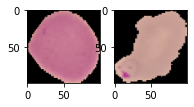

In [ ]:
print(len(uninfected_train), len(uninfected_test), len(infected_train), len(infected_test))
plt.subplot(1, 4, 1), plt.imshow(cv2.cvtColor(image_train[0], cv2.COLOR_BGR2RGB))
plt.subplot(1, 4, 2), plt.imshow(cv2.cvtColor(image_test[0], cv2.COLOR_BGR2RGB))
print(label_train[0])
print(label_test[0])


In [ ]:
print(np.array(image_train).shape)
print(image_train[0])

(18463, 100, 100, 3)
[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]


In [ ]:
import datetime
image_train = np.array(image_train)
image_test = np.array(image_test)
label_train = np.array(label_train)
label_test = np.array(label_test)

In [ ]:
from keras.layers import Convolution2D, MaxPool2D, Flatten, Dense, BatchNormalization, Dropout
from keras.models import Sequential
from keras import optimizers


In [ ]:
#building model time
start = datetime.datetime.now()
model = Sequential() 
model.add(Flatten(input_shape=image_train.shape[1:])) 
model.add(Dense(100, activation=keras.layers.LeakyReLU(alpha=0.3))) 
model.add(Dropout(0.5)) 
model.add(Dense(50, activation=keras.layers.LeakyReLU(alpha=0.3))) 
model.add(Dropout(0.3)) 
model.add(Dense(num_classes, activation="relu"))
model.compile(loss="binary_crossentropy",
   optimizer=optimizers.RMSprop(lr=1e-4),
   metrics=["acc"])
history = model.fit(image_train, image_train, 
   epochs=7,
   batch_size=batch_size)
model.save_weights(top_model_weights_path)
(eval_loss, eval_accuracy) = model.evaluate( 
    validation_data, validation_labels, batch_size=batch_size,     verbose=1)
print("[INFO] accuracy: {:.2f}%".format(eval_accuracy * 100)) 
print("[INFO] Loss: {}".format(eval_loss)) 
end= datetime.datetime.now()
elapsed= end-start
print ("Time: ", elapsed)

Epoch 1/7


ValueError: in user code:

    C:\Users\Pinkie\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:806 train_function  *
        return step_function(self, iterator)
    C:\Users\Pinkie\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:796 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    C:\Users\Pinkie\anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:1211 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    C:\Users\Pinkie\anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2585 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    C:\Users\Pinkie\anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2945 _call_for_each_replica
        return fn(*args, **kwargs)
    C:\Users\Pinkie\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:789 run_step  **
        outputs = model.train_step(data)
    C:\Users\Pinkie\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:748 train_step
        loss = self.compiled_loss(
    C:\Users\Pinkie\anaconda3\lib\site-packages\tensorflow\python\keras\engine\compile_utils.py:204 __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    C:\Users\Pinkie\anaconda3\lib\site-packages\tensorflow\python\keras\losses.py:149 __call__
        losses = ag_call(y_true, y_pred)
    C:\Users\Pinkie\anaconda3\lib\site-packages\tensorflow\python\keras\losses.py:253 call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    C:\Users\Pinkie\anaconda3\lib\site-packages\tensorflow\python\util\dispatch.py:201 wrapper
        return target(*args, **kwargs)
    C:\Users\Pinkie\anaconda3\lib\site-packages\tensorflow\python\keras\losses.py:1605 binary_crossentropy
        K.binary_crossentropy(y_true, y_pred, from_logits=from_logits), axis=-1)
    C:\Users\Pinkie\anaconda3\lib\site-packages\tensorflow\python\util\dispatch.py:201 wrapper
        return target(*args, **kwargs)
    C:\Users\Pinkie\anaconda3\lib\site-packages\tensorflow\python\keras\backend.py:4829 binary_crossentropy
        bce = target * math_ops.log(output + epsilon())
    C:\Users\Pinkie\anaconda3\lib\site-packages\tensorflow\python\ops\math_ops.py:1140 binary_op_wrapper
        raise e
    C:\Users\Pinkie\anaconda3\lib\site-packages\tensorflow\python\ops\math_ops.py:1124 binary_op_wrapper
        return func(x, y, name=name)
    C:\Users\Pinkie\anaconda3\lib\site-packages\tensorflow\python\ops\math_ops.py:1456 _mul_dispatch
        return multiply(x, y, name=name)
    C:\Users\Pinkie\anaconda3\lib\site-packages\tensorflow\python\util\dispatch.py:201 wrapper
        return target(*args, **kwargs)
    C:\Users\Pinkie\anaconda3\lib\site-packages\tensorflow\python\ops\math_ops.py:508 multiply
        return gen_math_ops.mul(x, y, name)
    C:\Users\Pinkie\anaconda3\lib\site-packages\tensorflow\python\ops\gen_math_ops.py:6175 mul
        _, _, _op, _outputs = _op_def_library._apply_op_helper(
    C:\Users\Pinkie\anaconda3\lib\site-packages\tensorflow\python\framework\op_def_library.py:742 _apply_op_helper
        op = g._create_op_internal(op_type_name, inputs, dtypes=None,
    C:\Users\Pinkie\anaconda3\lib\site-packages\tensorflow\python\framework\func_graph.py:591 _create_op_internal
        return super(FuncGraph, self)._create_op_internal(  # pylint: disable=protected-access
    C:\Users\Pinkie\anaconda3\lib\site-packages\tensorflow\python\framework\ops.py:3477 _create_op_internal
        ret = Operation(
    C:\Users\Pinkie\anaconda3\lib\site-packages\tensorflow\python\framework\ops.py:1974 __init__
        self._c_op = _create_c_op(self._graph, node_def, inputs,
    C:\Users\Pinkie\anaconda3\lib\site-packages\tensorflow\python\framework\ops.py:1815 _create_c_op
        raise ValueError(str(e))

    ValueError: Dimensions must be equal, but are 3 and 2 for '{{node binary_crossentropy/mul}} = Mul[T=DT_FLOAT](binary_crossentropy/Cast, binary_crossentropy/Log)' with input shapes: [?,100,100,3], [?,2].


In [ ]:
# building a linear stack of layers with the sequential model
model = Sequential()

# convolutional layer
model.add(Conv2D(50, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu', input_shape=(100, 100, 3)))

# convolutional layer
model.add(Conv2D(75, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(125, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

# flatten output of conv
model.add(Flatten())

# hidden layer
model.add(Dense(500, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(250, activation='relu'))
model.add(Dropout(0.3))
# output layer
model.add(Dense(10, activation='softmax'))

# compiling the sequential model
model.compile(loss='binary_crossentropy', metrics=['accuracy'], optimizer='adam')

# training the model for 10 epochs
model.fit(image_train, label_train, batch_size=128, epochs=10, )

Epoch 1/10
128/145 [=========================>....] - ETA: 8:57 - loss: 7.6243 - accuracy: 0.4331